# Multiple Linear Regression In-class Exercise

Before starting the lab, the following exercise will perform a simple multiple variable linear fitting on a civil engineering dataset.  In doing this exercise, you will learn to:

* Load data from a `csv` file using the `pandas` package
* Visualize relations between different variables with a scatter plot.
* Fit a multiple variable linear model using the `sklearn` package
* Evaluate the fit.

We begin by loading the packages we will need.

In [76]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import linear_model
import pandas as pd

## Download Data

Concrete is one of the most basic construction materials.  In this exercise, you will download a simple dataset for predicting the strength of concrete from the attributes of concrete.  The data set comes from this very nice
[kaggle competition](https://www.kaggle.com/maajdl/yeh-concret-data).  Kaggle has many excellent dataset for your project.  
You can download the data with the following command.  After running this command, you should have the file `data.csv` in your local folder.

In [77]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit03_mult_lin_reg/Concrete_Data_Yeh.csv'
fn_dst = 'data.csv'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

File data.csv is already downloaded


The `pandas` package has excellent methods for loading `csv` files.  YThe following command loads the `csv` file into a dataframe `df`.

In [78]:
df = pd.read_csv('data.csv')

Ues the `df.head()` to print the first few rows of the dataframe.

In [79]:
# TODO
df.head()

,cement,slag,flyash,water,superplasticizer,coarseaggregate,fineaggregate,age,csMPa
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In this exercise, the target variable will be the concrete strength in Megapascals, `csMPa`.  We will use the other 8 attributes as predictors to predict the strength.  

Create a list called `xnames` of the 8 names of the predictors.  You can do this as follows:
* Get the list of names of the columns from `df.columns.tolist()`.  
* Remove the last items from the list using indexing.

Print the `xnames`.

In [80]:
# TODO
xnames = df.columns.tolist()

print(xnames)

target = xnames[-1]     # csMPa
xnames = xnames[:-1]
xnames
#   xnames = ...

['cement', 'slag', 'flyash', 'water', 'superplasticizer', 'coarseaggregate', 'fineaggregate', 'age', 'csMPa']


['cement',
 'slag',
 'flyash',
 'water',
 'superplasticizer',
 'coarseaggregate',
 'fineaggregate',
 'age']

Get the data matrix `X` and target vector `y` from the dataframe `df`.  

Recall that to get the items from a dataframe, you can use syntax such as

    s = np.array(df['slag'])  
        
which gets the data in the column `slag` and puts it into an array `s`.  You can also get multiple columns with syntax like

    X12 = np.array(df['cement', 'slag'])  


In [81]:
# TODO
X = df[xnames]
y = df[target]
#    X = ...
#    y = ...

Using the subplot command, create two plots, side-by-side with:
* `y` vs. the `cement` on the left (attribute 0)
* `y` vs. the `water` on the right (attribute 3)
Label the axes and use the `plt.tight_layout()` to adjust the plots nicely at the end.

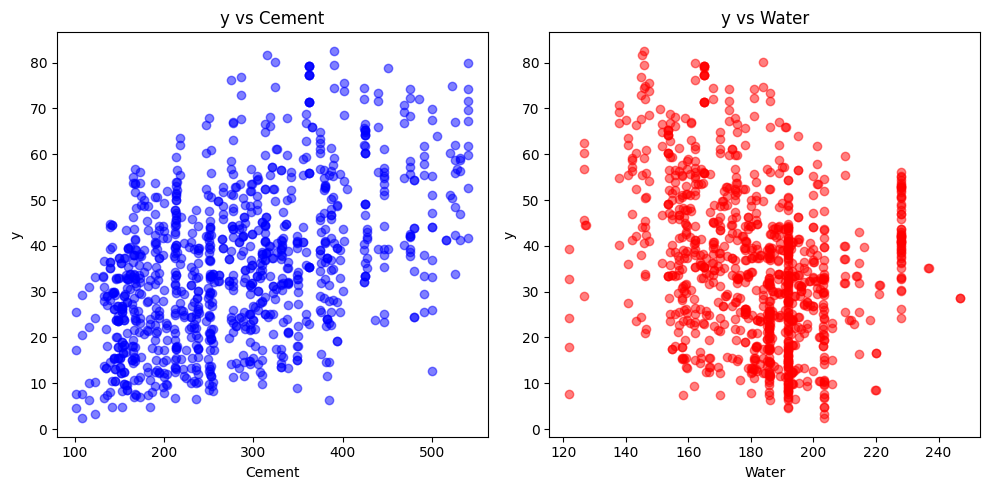

In [82]:
# TODO
fig, ax = plt.subplots(1, 2, figsize=(10, 5))  # Create 1 row, 2 columns of subplots

ax[0].scatter(X['cement'], y, color='b', alpha=0.5)  # Left plot (cement vs y)
ax[0].set_xlabel('Cement')
ax[0].set_ylabel('y')
ax[0].set_title('y vs Cement')

ax[1].scatter(X['water'], y, color='r', alpha=0.5)  # Right plot (water vs y)
ax[1].set_xlabel('Water')
ax[1].set_ylabel('y')
ax[1].set_title('y vs Water')

plt.tight_layout()  # Adjust subplot spacing
plt.show()


## Split the Data into Training and Test

Split the data into training and test.  Use 30% for test and 70% for training.  You can do the splitting manually or use the `sklearn` package `train_test_split`.   Store the training data in `Xtr,ytr` and test data in `Xts,yts`.


In [83]:
from sklearn.model_selection import train_test_split

# TODO
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
#  Xtr,Xts,ytr,yts = train_test_split(...)

## Fit a Linear Model

Create a linear regression model object `reg` and fit the model on the training data.


In [84]:
# TODO
#   reg = ...
#   reg.fit(...)

num_attributes = X.shape[1]

class LinearRegression:
    def __init__(self, X, y):
        self.X = np.array(X)
        self.y = np.array(y)
        self.num_attributes = self.X.shape[1]
        self.coef_ = np.zeros(self.num_attributes)
        self.intercept_ = 0

    def fit(self):
        y_mean = np.mean(self.y)
        syy = np.mean((self.y - y_mean) ** 2)

        for k in range(self.num_attributes):
            x_mean = np.mean(self.X[:, k])
            sxy = np.mean((self.X[:, k] - x_mean) * (self.y - y_mean))
            sxx = np.mean((self.X[:, k] - x_mean) ** 2)

            if sxx != 0:  # Prevent division by zero
                self.coef_[k] = sxy / sxx
            else:
                self.coef_[k] = 0

        self.intercept_ = y_mean - np.sum(self.coef_ * np.mean(self.X, axis=0))

        print(f"Intercept: {self.intercept_}")
        print(f"Coefficients: {self.coef_}")

    def predict(self, X_new):
        return self.intercept_ + np.dot(X_new, self.coef_)

    def score(self):
        yhat_tr = self.predict(self.X)
        y_mean = np.mean(self.y)

        ss_total = np.sum((self.y - y_mean) ** 2)
        ss_residual = np.sum((self.y - yhat_tr) ** 2)

        r2 = 1 - (ss_residual / ss_total)
        print(f"R^2 on training data: {r2:.6f}")
        return r2

reg = LinearRegression(x_train, y_train)
reg.fit()

Intercept: 107.12287574514178
Coefficients: [ 0.07703434  0.0276539  -0.03626076 -0.23930458  1.04760589 -0.03692611
 -0.03127661  0.08934546]


Compute the predicted values `yhat_tr` on the training data and print the `R^2` value on the training data.

In [85]:
# TODO
#    yhat_tr = ...
#    rsq_tr = ...


yhat_tr = reg.predict(x_train)
rsq_tr = reg.score()
# print(f'Predicted y-values: {yhat_tr}')
print(f'Root Square Error: {rsq_tr}')

R^2 on training data: 0.528433
Root Square Error: 0.5284333081226162


Now compute the predicted values `yhat_ts` on the test data and print the `R^2` value on the test data.

In [86]:
# TODO
#    yhat_ts = ...
#    rsq_ts = ...

yhat_ts = reg.predict(x_test)
rsq_ts = reg.score()
print(f'Root Square Error: {rsq_ts}')

R^2 on training data: 0.528433
Root Square Error: 0.5284333081226162


Create a scatter plot of the actual vs. predicted values of `y` on the test data.

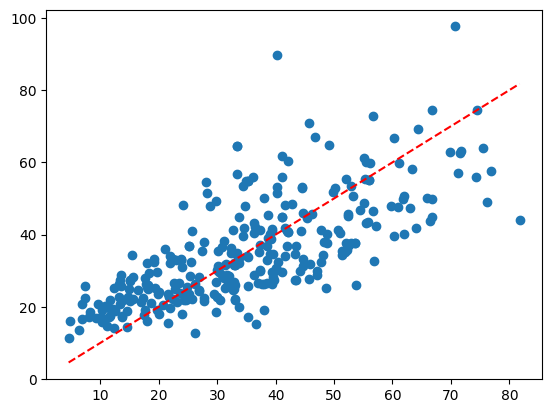

In [87]:
# TODO

plt.scatter(x=y_test,y=yhat_ts)

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red', linestyle='--')


## Evaluating Different Variables

One way to see the importance of different variables is to compute the *normalized* coefficients:

    coeff_norm[j]  = reg.coef_[j] * std(Xtr[:,j]) / std(ytr) 
    
which represents the change in the target for a change of one standard deviation in the attribute `j`.  The change in the target is normalized by its standard deviation.  

Compute the `coeff_norm` for the 8 attributes and plot the values using a `plt.stem()` plot.

In [92]:
# TODO
# coeff_norm = ...

coeff_norm = reg.coef_ * np.std(x_train, axis=0) / np.std(y_train)
coeff_norm

cement              0.496768
slag                0.144358
flyash             -0.137476
water              -0.301323
superplasticizer    0.376959
coarseaggregate    -0.172526
fineaggregate      -0.149139
age                 0.327801
dtype: float64

Which variable has the highest normalized coefficient, and hence most influence on the concrete strength?

In [99]:
# TODO

# cement is the higest normalized features

largest_norm_index = np.argmax(coeff_norm)  # Index of the highest normalized coefficient
max_norm_value = coeff_norm[largest_norm_index]  # The highest normalized coefficient

most_important_feature = largest_norm_index  # The feature index with the highest influence

print(f"Most important feature index: {most_important_feature}")
print(f"Highest normalized coefficient value: {max_norm_value}")


Most important feature index: 0
Highest normalized coefficient value: 0.4967676126419126
0.4967676126419126


/var/folders/y0/tql4kxn91m51l1_d96hty_z40000gn/T/ipykernel_97615/1569713908.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_norm_value = coeff_norm[largest_norm_index]  # The highest normalized coefficient
/var/folders/y0/tql4kxn91m51l1_d96hty_z40000gn/T/ipykernel_97615/1569713908.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(coeff_norm[most_important_feature])
